# Лабораторная работа №2
## Зернова Марина
## 15-АС
## Вариант 7 (Mushrooms)
## Классификаторы: 
### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
### 3 – линейный классификатор (персептрон).

### Цель лабораторной работы – получение навыков работы с методами классификации.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.pylab import rc, plot

df = pd.read_csv('mushrooms.csv')

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам грибов в семействе грибов Agaricus и Lepiota, взятых из «Справочника сообщества Одубон» по североамериканским грибам (1981). Каждый вид идентифицируется как определенно съедобный, определенно ядовитый или неизвестной съедобности. Этот последний класс был объединен с ядовитым. В Руководстве четко указано, что нет простого правила для определения съедобности гриба; нет такого правила, как «leaflets three, let it be» для ядовитого дуба и плюща.

Информация об атрибутах: (classes: съедобный = e, ядовитый = p)

cap-shap: Форма шляпки   
cap-surface: Поверхность шляпки   
cap-color: Цвет шляпки   
bruises: Пятна   
odor: Запах   
gill-attachment: Форма пластинок (ламел)  
gill-spacing: Расстояние между пластинками   
gill-size: Размер пластинок  
gill-color: Цвет пластинок   
stalk-shape: Форма ножки   
stalk-root: Корень   
stalk-surface-above-ring: Форма ножки выше юбки   
stalk-surface-below-ring: Форма ножки ниже юбки   
stalk-color-above-ring: Цвет ножки выше юбки   
stalk-color-below-ring: Цвет ножки ниже юбки   
veil-type: Форма юбочки   
veil-color: Цвет юбочки    
ring-number: Количество колец   
ring-type: Тип кольца   
spore-print-color: Цвет спор   
population: Популяция   
habitat: Среда обитания  

### 2. Удалите дубликаты строк в наборе данных.

In [10]:
df.shape

(8124, 23)

In [11]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(8124, 23)

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 3.	Оцените сбалансированность данных по классам. Используйте полученную информацию при выборе метрики оценки качества классификации

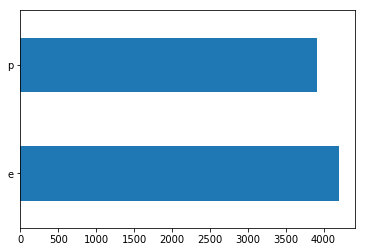

In [13]:
df['class'].value_counts().plot.barh()
plt.show()

#### Классы сбалансированы

### 4.	Выполните масштабирование количественных признаков
Масштабирование не требуется 



### 5.	Выполните замену категориальных признаков

In [14]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [15]:
df.drop('veil-type', axis = 1, inplace = True)
label_encoder = LabelEncoder()
mapped_education = pd.Series(label_encoder.fit_transform(df['bruises']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: 'f', 1: 't'}


In [16]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['bruises'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### 6.	Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других

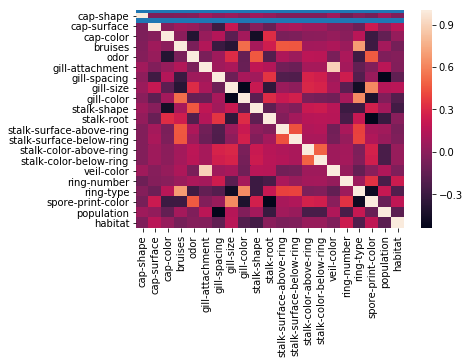

In [17]:
corr_matrix = df.drop('class', axis=1).corr()
sns.heatmap(corr_matrix);
plt.show()

In [18]:
df_corr

NameError: name 'df_corr' is not defined

### 7.	Заполните пропущенные значения в данных
Не требуется

### 8.	Решите поставленную задачу классификации в соответствии с заданием

In [42]:
# делим данные для обучения и теста
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(5686, 21)
(2438, 21)


In [43]:
# k ближайших соседей
rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(0, 5, 0.25)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9950756243404854 	 at radius: 3.0
test score:  0.996308449549


In [44]:
# персептрон
slf = sk.linear_model.Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,2,20)[1:],n_iter=[int(50)]), n_jobs=int(10))
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
print('best score=',best_score,'at alpha',selected_alpha)
best_n_iter = paramsearch.best_estimator_.n_iter
best_n_jobs = paramsearch.best_estimator_.n_jobs

dtc = sk.linear_model.Perceptron(alpha=selected_alpha,n_iter=best_n_iter,n_jobs=best_n_jobs)
dtc.fit(X_train, y_train)
test_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', test_score)

best score= 0.8844530425606754 at alpha 0.105263157895
test score:  0.676784249385


In [45]:
class CustomClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
        '''
        Общее описание.
         Определяет вероятность того, что тестовый экземпляр соответствует классу.
        
         Алгоритм.
         Мы пройдем нулевой радиус до радиуса двойного классификатора
         с элементарным шагом (dr). Если экземпляр находится вдоль:
         * Zero raduis + dr - соответствует 100%
         * Классификатор raduis + dr - соответствует 50%
         * Двойной классификатор raduis + dr и за его пределами - соответствует 0%
         Имеются промежуточные значения процентов. Каждый шаг соответствует своему
         собственному процентному(от всей величины) значению. Если предсказанный экземпляр меняет
         класс, этот экземпляр принадлежит текущему радиусу.
        
        '''
        runs = 25
        dr = (2*self.radius/runs)
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

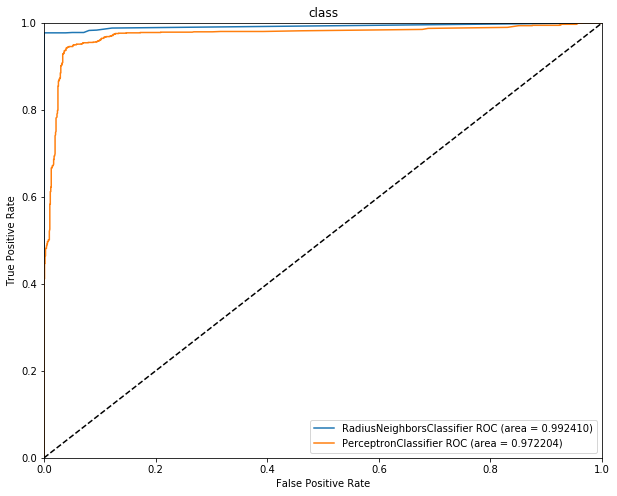

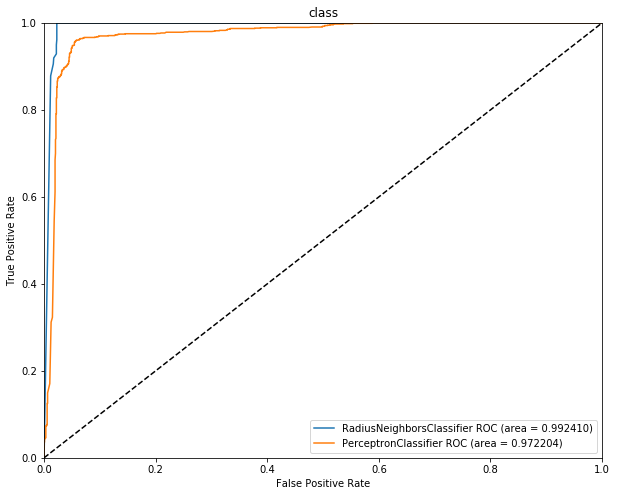

In [46]:
clf_isotonic = CalibratedClassifierCV(slf, cv=10, method='isotonic')
clf_isotonic.fit(X_train, y_train)
probas_slf0 = clf_isotonic.predict_proba(X_test)
clf_isotonic.fit(X_train, y_train)
probas_slf1 = clf_isotonic.predict_proba(X_test)

#ROC графики
plt.figure(figsize=(10,8))
# K соседей
mrnc = CustomClassifier(outlier_label=1, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test, probas_mrnc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Персептрон
tpr, fpr, thresholds = roc_curve(y_test, probas_slf0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, probas_mrnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Персептрон
fpr, tpr, thresholds = roc_curve(y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

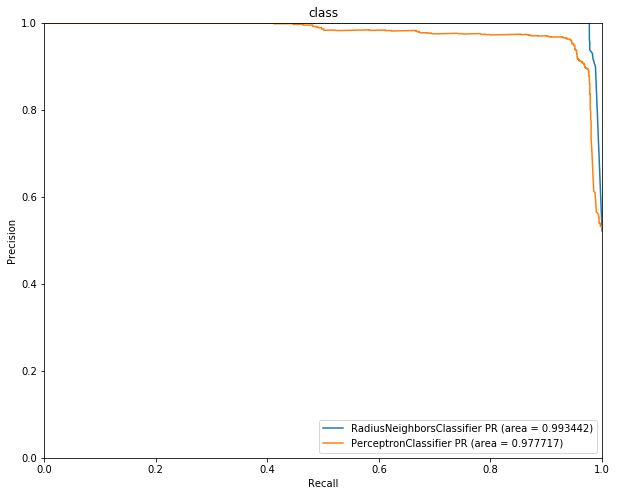

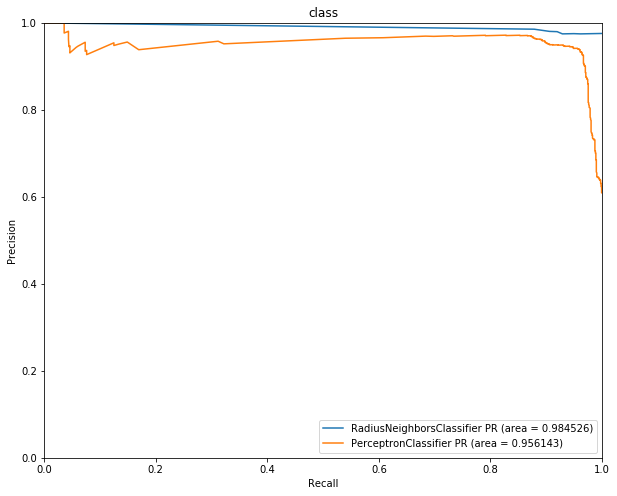

In [47]:
#PR графики
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
# K соседей
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_mrnc1[:,0])
aps_mrnc1 = average_precision_score(y_test_invers,probas_mrnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1))
# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf1[:,0])
aps_slf1 = average_precision_score(y_test_invers,probas_slf1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1))
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(y_test,probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1))
# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

 ### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы. 
Классификаторы K ближайших соседей и линейный классификатор имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью ~0.88 и ~0.99, что достаточно точно.